# ユーティリティ関数の検討

## データの前処理

テキストで管理されているの．csvに変換しておくか？


In [6]:
import re
import pandas as pd
import numpy as np



In [2]:
path = "./dat/30523.dat"
with open(path, "rt") as f:
    arr = np.array(re.split("[\t\n]", f.read()))
    
grp = np.cumsum(arr == ">")
lonlat = pd.DataFrame({
    "grp":grp, 
    "lon":arr
})
lonlat = lonlat.loc[lonlat.loc[:, "lon"] != ">"]
lonlat.loc[:, "lat"] = lonlat.loc[:, "lon"].shift(-1)
lonlat = lonlat.iloc[:-2:2]
lonlat.loc[:, "lon"] = np.array(lonlat.loc[:, "lon"], dtype = np.float32)
lonlat.loc[:, "lat"] = np.array(lonlat.loc[:, "lat"], dtype = np.float32)
lonlat.to_csv("./dat/30523.csv", index = False)

あるいは, ">"の部分をNone, Noneに置換するか.

こちらの方がループを記述する必要がないので楽かもしれない. 

In [24]:
path = "./dat/30523.dat"
with open(path, "rt") as f:
    raw_string = f.read()
    

In [62]:
# 末尾の余計な行を削除 + 型変換
normed_string = re.sub(">", r"nan\tnan", raw_string[:-1])
splitted_normed_string = re.split("[\t\n]", normed_string)
arr = np.array(splitted_normed_string, dtype = np.float32)
arr = arr.reshape(-1, 2)
np.savetxt("./dat/30523.txt", arr, fmt = "%3.6f")

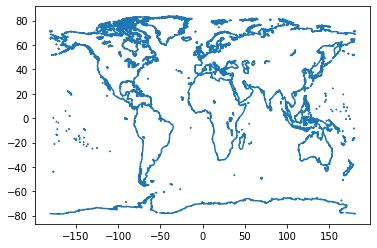

In [63]:
import matplotlib.pyplot as plt
coast_line = np.loadtxt("./dat/30523.txt")
plt.plot(coast_line[:, 0], coast_line[:, 1])

In [59]:
coast_line

array([[      nan,       nan],
       [ 0.19244 ,  5.669954],
       [-0.114995,  5.515063],
       ...,
       [19.987995, 80.449508],
       [19.950445, 80.416653],
       [19.959833, 80.402572]])